In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-10-08 19:01:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-10-08 19:01:56 (107 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [4]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    Dropout
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6604 - accuracy: 0.5875 - val_loss: 0.5523 - val_accuracy: 0.7715
Epoch 2/30
625/625 - 3s - loss: 0.4083 - accuracy: 0.8386 - val_loss: 0.3747 - val_accuracy: 0.8457
Epoch 3/30
625/625 - 2s - loss: 0.3001 - accuracy: 0.8801 - val_loss: 0.3494 - val_accuracy: 0.8524
Epoch 4/30
625/625 - 2s - loss: 0.2486 - accuracy: 0.9026 - val_loss: 0.3476 - val_accuracy: 0.8559
Epoch 5/30
625/625 - 3s - loss: 0.2158 - accuracy: 0.9165 - val_loss: 0.3468 - val_accuracy: 0.8518
Epoch 6/30
625/625 - 2s - loss: 0.1883 - accuracy: 0.9281 - val_loss: 0.3751 - val_accuracy: 0.8426
Epoch 7/30
625/625 - 2s - loss: 0.1670 - accuracy: 0.9365 - val_loss: 0.3715 - val_accuracy: 0.8515
Epoch 8/30
625/625 - 2s - loss: 0.1504 - accuracy: 0.9434 - val_loss: 0.4366 - val_accuracy: 0.8322
Epoch 9/30
625/625 - 2s - loss: 0.1349 - accuracy: 0.9507 - val_loss: 0.4209 - val_accuracy: 0.8423
Epoch 10/30
625/625 - 2s - loss: 0.1203 - accuracy: 0.9585 - val_loss: 0.4305 - val_accuracy: 0.8474

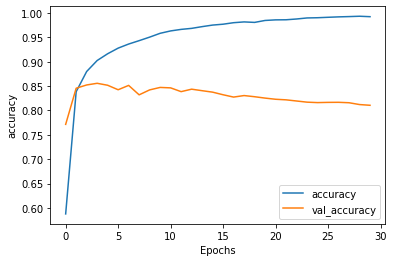

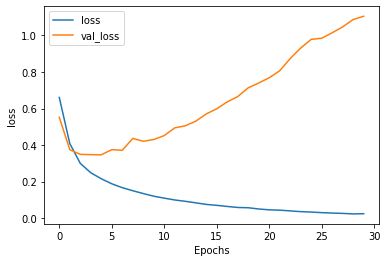

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.5619106e-01]
 [1.4824507e-05]]


In [34]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D

In [36]:
model1 = tf.keras.Sequential()

model1.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model1.add(Bidirectional(LSTM(128, return_sequences = True)))
model1.add(GlobalMaxPool1D())
model1.add(Dense(40, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(20, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
num_epochs = 30
history = model1.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 9s - loss: 0.5302 - accuracy: 0.7139 - val_loss: 0.3504 - val_accuracy: 0.8478
Epoch 2/30
625/625 - 9s - loss: 0.2946 - accuracy: 0.8908 - val_loss: 0.3463 - val_accuracy: 0.8544
Epoch 3/30
625/625 - 9s - loss: 0.1901 - accuracy: 0.9342 - val_loss: 0.3690 - val_accuracy: 0.8536
Epoch 4/30
625/625 - 9s - loss: 0.1244 - accuracy: 0.9596 - val_loss: 0.4592 - val_accuracy: 0.8492
Epoch 5/30
625/625 - 9s - loss: 0.0877 - accuracy: 0.9739 - val_loss: 0.5240 - val_accuracy: 0.8445
Epoch 6/30
625/625 - 9s - loss: 0.0633 - accuracy: 0.9816 - val_loss: 0.8475 - val_accuracy: 0.8433
Epoch 7/30
625/625 - 9s - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.9924 - val_accuracy: 0.8369
Epoch 8/30
625/625 - 9s - loss: 0.0353 - accuracy: 0.9902 - val_loss: 1.3621 - val_accuracy: 0.8284
Epoch 9/30
625/625 - 9s - loss: 0.0251 - accuracy: 0.9923 - val_loss: 1.4834 - val_accuracy: 0.8372
Epoch 10/30
625/625 - 9s - loss: 0.0219 - accuracy: 0.9940 - val_loss: 1.6520 - val_accuracy: 0.8308